# Q1

From chain rule we get:
$$
f_{\nu}=\frac{d f}{d \nu}=\frac{d f}{d \lambda} \frac{d \lambda}{d \nu}=-\frac{d \lambda}{d \nu} f_{\lambda}
$$

where we use the minus sign for correcting for making $f_\lambda$ positive.

As
$$
\lambda=\frac{c}{\nu} \quad \frac{d \lambda}{d \nu}=-\frac{c}{\nu^{2}}
$$

We get the conversion formula:
$$
f_{\nu}=\frac{c}{\nu^{2}} f_{\lambda}=\frac{\lambda^{2}}{c} f_{\lambda}
$$

# Q2

**(a)**

In [1]:
import astropy.constants as c, astropy.units as u
import numpy as np, matplotlib.pyplot as plt

In [5]:
for i in [1]:
    print(i)

1


In [2]:
lambd_1 = 440*u.nm
lambd_2 = 550*u.nm
T = np.logspace(np.log10(3000),np.log10(30000),100)*u.K

In [3]:
F = lambda lambd, T: 2*c.h*c.c**2/lambd**5/(np.exp(c.h*c.c/lambd/c.k_B/T)-1)
F_1 = F(lambd_1, T)
F_2 = F(lambd_2, T)

Log-log plot of temperature vs measured flux ratio with temperature varying between 3000 and 30000K.

No handles with labels found to put in legend.


[0.4, 3.0, 3000, 30000]

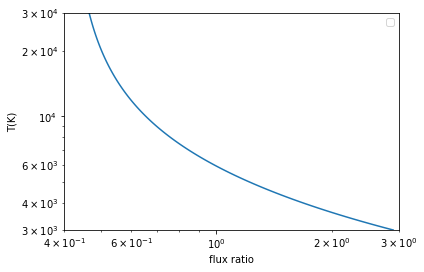

In [4]:
plt.loglog(F_2/F_1, T)
plt.xlabel('flux ratio');plt.ylabel('T(K)');plt.legend()
plt.axis([4e-1, 3e0,3000,30000])

**(b)**

In Wien's limit, flux ratio writes:
$$
f_{\lambda}=\frac{2 h c^{2}}{\lambda^{5}} e^{-\frac{h c}{\lambda k T}}
$$

For two wavelength, we get:
$$
f_{1}=\frac{2 h c^{2}}{\lambda_{1}^{5}} e^{-\frac{h c}{\lambda_{1} k T}}
$$

$$
f_{2}=\frac{2 h c^{2}}{\lambda_{2}^{5}} e^{-\frac{h c}{\lambda_{2} k T}}
$$

Hence the flux ratio writes:
$$
\frac{f_2}{f_1}=\frac{\lambda_{1}^5}{\lambda_{2}^{5}} e^{\frac{h c}{k T}(\frac{1}{\lambda_1}-\frac{1}{\lambda_2})}
$$

After a few algebra, we can get the temperature is given by: 

$$
T=\frac{h c}{k_{B}}\left(\frac{1}{\lambda_{1}}-\frac{1}{\lambda_{2}}\right) \frac{1}{\ln \left(f_{2} / f_{1}\right)+5 \ln \left(\lambda_{2} / \lambda_{1}\right)}
$$

Plot of approximation formula and exact formula

In [5]:
T_wien = lambda lambd_1, lambd_2, f_r: (c.h*c.c/c.k_B*(1/lambd_1-1/lambd_2)
                                        /(np.log(f_r)+5*np.log(lambd_2/lambd_1))).to(u.K)

In [6]:
f_r = np.logspace(-1,1,100)
T_w = T_wien(lambd_1,lambd_2, f_r)
#R(lambd_1, lambd_2, T)

[0.4, 3.0, 3000, 30000]

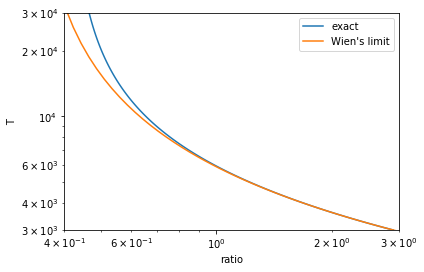

In [7]:
plt.loglog(F_2/F_1, T,label="exact")
plt.loglog(f_r, T_w ,label="Wien's limit")
plt.xlabel('ratio');plt.ylabel('T');plt.legend()
plt.axis([4e-1, 3e0, 3000,30000])

we can see that when temperature is high or the flux ratio is low, wien's limit is not very good.

**(c)**

From Poisson statistics, the uncertainty of measurement is  
$\sqrt{N} \approx\sqrt{10000}=100$

Then precision of measurement $\approx 100/10000 =0.01$

precision of flux ratio is approximately $\sqrt{0.01^2+0.01^2} \approx 0.01414$

we use the following code to illustate the accuracy of temperature measurement using flux ratio.

At low temperature, we use the wien approimation as it gives a good approximation to the exact case.

At high temperature, we use intepolation module to calculate the temperature. 

In [8]:
from scipy import interpolate
err=np.sqrt(0.01**2+0.01**2)

T_ex = interpolate.interp1d(F_2/F_1,T)

T_1 = 4000*u.K
T_2 = 20000*u.K
r_1 = F(lambd_2, T_1)/F(lambd_1, T_1) 
r_2 = F(lambd_2, T_2)/F(lambd_1, T_2) 

T_4000_lower = T_wien(lambd_1, lambd_2, r_1*(1+err))
T_4000_higher = T_wien(lambd_1, lambd_2, r_1*(1-err))

T_20000_lower = T_ex(r_2*(1+err))*u.K
T_20000_higher = T_ex(r_2*(1-err))*u.K

print('Temperature measurement of 4000K fall in range between {:.2f} to {:.2f}:'
      .format(T_4000_lower,T_4000_higher))
print('Temperature measurement of 20000K fall in range between {:.2f} to {:.2f}:'
      .format(T_20000_lower,T_20000_higher))

Temperature measurement of 4000K fall in range between 3963.14 K to 4032.26 K:
Temperature measurement of 20000K fall in range between 18896.47 K to 21285.47 K:


We can see that the precision of measurement of 4000K is about 30/4000=0.75%, whereas for 20000K, the precision is about 1200/20000=6%. The measurement of 4000K is more precise.

# Q3

**(a)**

We use interpolation to calculate the temperature of star

In [9]:
lambd_1 = 532*u.nm
lambd_2 = 797*u.nm
T = np.logspace(np.log10(3000),np.log10(10000),100)*u.K
F_1 = F(lambd_1, T)
F_2 = F(lambd_2, T)
T_ex = interpolate.interp1d(F_2/F_1,T)

f_1 = 5.9e-13*u.erg/u.s/u.cm**2/u.Angstrom
f_2 = 4.8e-13*u.erg/u.s/u.cm**2/u.Angstrom
T_star = T_ex(f_2/f_1)*u.K
print('The temperature of star is:{:.2f}'.format(T_star))

The temperature of star is:5019.73 K


**(b)**

In [10]:
D = 1/19e-3*u.pc
print('The distance to the star is:{:.2f}'.format(D))
print('The distance to the star is:{:.2f}'.format(D.to(u.km)))

The distance to the star is:52.63 pc
The distance to the star is:1624040832351153.50 km


**(c)**

Using inverse square law:
$$f_{earth} = \frac{f_\lambda R_{sun}^2}{D^2}$$

we get:
$$R_{sun} = D \sqrt{\frac{f_{earth}}{f_\lambda}}$$

We perform this calculation for two filters.

In [11]:
#(c)
lambd = 532*u.nm
F_earth = 5.9e-13*u.erg/u.s/u.cm**2/u.Angstrom
ratio = F_earth/F(lambd, T_star)
R_star = D*np.sqrt(ratio)
print('The radius of the star is: {:.2f}'.format(R_star.to(u.R_sun)))

The radius of the star is: 1.58 solRad


In [12]:
lambd = 797*u.nm
F_earth = 4.8e-13*u.erg/u.s/u.cm**2/u.Angstrom
ratio = F_earth/F(lambd, T_star)
R_star = D*np.sqrt(ratio)
print('The radius of the star is: {:.2f}'.format(R_star.to(u.R_sun)))

The radius of the star is: 1.58 solRad


We can see that they give approximately the same answer.

**(d)**

We calculate Luminosity using Stefan-Boltzmann law:

In [13]:
L = c.sigma_sb*T_star**4*4*np.pi*R_star**2
print('The Luminosity of the star is: {:.2f}'.format(L.to(u.L_sun)))

The Luminosity of the star is: 1.43 solLum


From the temperature and luminosity of the star, we see that it lies in the main sequence in the HR-diagram. They are main sequence star.